/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_12380/1216966996.py:12: UserWarning: loadtxt: input contained no data: "./ShuEnergies/v0b14.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_12380/1216966996.py:12: UserWarning: loadtxt: input contained no data: "./ShuEnergies/v0b18.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_12380/1216966996.py:12: UserWarning: loadtxt: input contained no data: "./ShuEnergies/v0b2.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_12380/1216966996.py:12: UserWarning: loadtxt: input contained no data: "./ShuEnergies/v0b25.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_12380/1216966996.py:12: UserWarning: loadtxt: input contained no data: "./ShuEnergies/v0b27.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_12380/1216966996.py:12: UserWarn

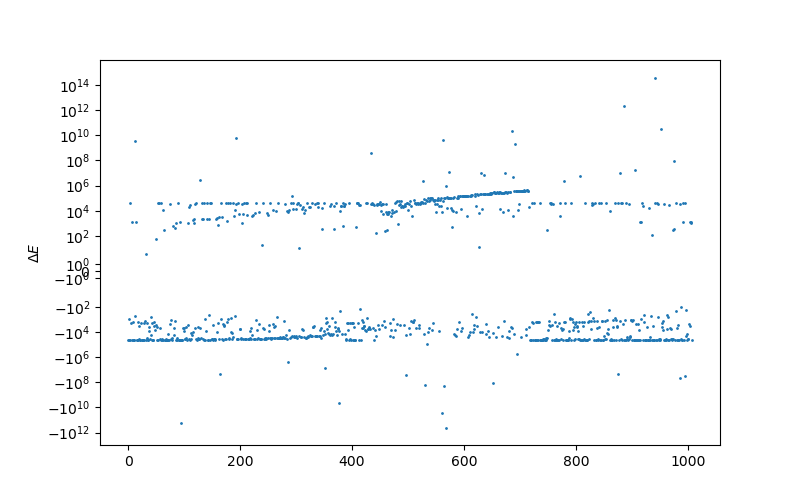

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
from fast_histogram import histogram1d

folder = './ShuEnergies'
energies = sorted(os.listdir(folder))
Efinal = []

for e in energies:
    path = os.path.join(folder, e)
    evec = np.loadtxt(path)

    if evec.size == 0:
        #print(f"Skipped empty file: {e}")
        continue

    if evec.size == 1:
        Efinal.append(evec)
        continue

    Efinal.append(evec[-1]-evec[0])

plt.clf()
plt.ylabel(r'$\Delta E$')
plt.scatter(range(len(Efinal)), Efinal, s=1)
plt.yscale('symlog')
plt.show()

In [5]:
def log_histogram(data, bins):
    data = np.array(data)
    positive_data = data[data > 0]
    negative_data = -data[data < 0]

    min_val = min(positive_data.min(), negative_data.min())
    max_val = max(positive_data.max(), negative_data.max())

    log_bins = np.logspace(np.log10(min_val), np.log10(max_val), num=bins+1)

    neg_bins = -log_bins[::-1]
    all_bins = np.concatenate([neg_bins, [0], log_bins])

    counts, edges = np.histogram(data, bins=all_bins)

    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=all_bins, histtype='step')

log_histogram(E_all_flat, bins=30)
plt.xscale('symlog', linthresh=1e1)
plt.yscale('log')
plt.xlabel(r'Energy $\left(\frac{m^2}{s^2}\right)$')
plt.ylabel('Counts')
plt.title('Individual Energy Datapoint Frequency')
plt.show()

NameError: name 'E_all_flat' is not defined

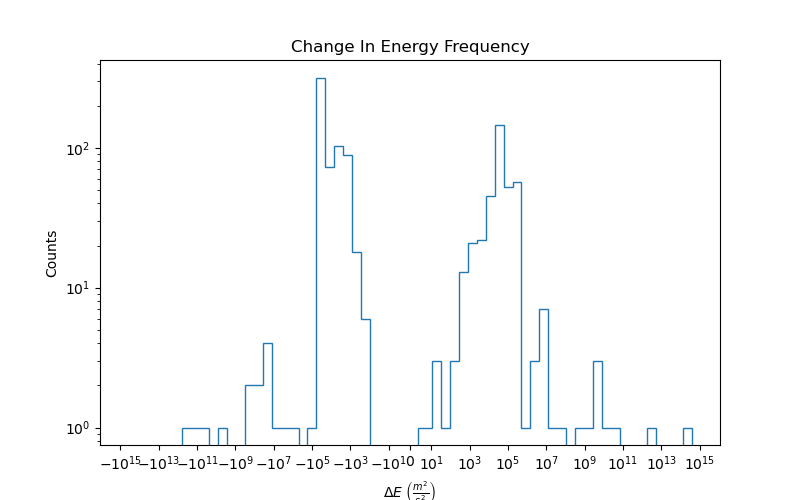

In [6]:
%matplotlib widget
log_histogram(Efinal, bins=30)
plt.xscale('symlog', linthresh=1e1)
plt.yscale('log')
plt.xlabel(r'$\Delta E$ $\left(\frac{m^2}{s^2}\right)$')
plt.ylabel('Counts')
plt.title('Change In Energy Frequency')
plt.show()